In [4]:
# Import pandas
import pandas as pd
import numpy as np

# --- 1. Data Acquisition and Initial Inspection ---
print("--- 1. Data Acquisition and Initial Inspection ---")

# Load the dataset
# The dataset might have encoding issues. 'latin-1' or 'ISO-8859-1' often works for this dataset.
try:
    df = pd.read_csv("spam.csv", encoding="latin-1")
    print("Dataset loaded successfully with 'latin-1' encoding.")
except UnicodeDecodeError:
    df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
    print("Dataset loaded successfully with 'ISO-8859-1' encoding.")
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please ensure you've uploaded it to Colab's session storage.")
    exit()


# Display the first few rows
print("\nFirst 5 rows of the raw dataset:")
print(df.head())

# Get information about the dataset
print("\nDataset Information:")
df.info()

# --- Data Description and Initial Cleaning for Usability ---
# The dataset has several unnamed columns that are mostly empty. We only need 'v1' (label) and 'v2' (text).
df = df[['v1', 'v2']]
df.columns = ['label', 'text'] # Rename columns for clarity

# Convert labels to numerical format (0 for ham, 1 for spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print("\nFirst 5 rows of processed data (selected columns and mapped labels):")
print(df.head())

print("\nValue counts for 'label':")
print(df['label'].value_counts())
print("\nPercentage distribution for 'label':")
print(df['label'].value_counts(normalize=True) * 100)

# --- Justification for Data Source ---
# This dataset is widely used for spam detection tasks, making it a good benchmark.
# It contains a reasonable number of samples (over 5500) with pre-labeled text messages,
# suitable for training a supervised classification model.
# The data is simple (text and label), allowing focus on NLP techniques and model building.

--- 1. Data Acquisition and Initial Inspection ---
Dataset loaded successfully with 'latin-1' encoding.

First 5 rows of the raw dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          55

In [7]:
# --- 3. Data Cleaning & Preprocessing ---
print("\n--- 3. Data Cleaning & Preprocessing ---")

# Ensure pandas is imported if you're running this cell in isolation after loading data
import pandas as pd
import numpy as np # Though numpy might not be directly used in this specific block, it's good practice

# This assumes 'df' is already loaded from Stage 2 (Data Acquisition)
# Example:
# df = pd.read_csv("spam.csv", encoding="latin-1")
# df = df[['v1', 'v2']]
# df.columns = ['label', 'text']
# df['label'] = df['label'].map({'ham': 0, 'spam': 1})


# Check for missing values
print("\nMissing values before cleaning:")
if 'df' in locals() and isinstance(df, pd.DataFrame): # Check if df exists and is a DataFrame
    print(df.isnull().sum())
else:
    print("DataFrame 'df' not found. Please ensure Stage 2 (Data Acquisition) has been run successfully.")
    # You might want to stop execution here if df is critical for the rest of the cell
    # For example, by raising an error or exiting.
    # For now, we'll let it proceed but subsequent operations might fail.

# Check for duplicates
if 'df' in locals() and isinstance(df, pd.DataFrame):
    initial_rows = len(df)
    # It's good practice to make sure 'label' and 'text' columns exist if this cell is run standalone after df creation
    if 'label' in df.columns and 'text' in df.columns:
        df.drop_duplicates(inplace=True)
        print(f"\nNumber of rows after removing duplicates: {len(df)} (Removed {initial_rows - len(df)} duplicates)")
    else:
        print("Warning: 'label' or 'text' columns not found in DataFrame for duplicate removal. Ensure Stage 2 was run successfully.")
else:
    print("DataFrame 'df' not found for duplicate removal.")


# --- Text Preprocessing Steps ---
# We'll use NLTK for this.
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (run these cells once)
# This approach is generally more robust in Colab.
# The download function will check if the resource exists and only download if needed.
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True) # Open Multilingual Wordnet, a WordNet dependency
# Download the missing punkt_tab resource as identified
nltk.download('punkt_tab', quiet=True)

print("NLTK resources check/download complete.")

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function for preprocessing text
def preprocess_text(text):
    # Ensure input is a string
    if not isinstance(text, str):
        text = str(text) # Attempt to convert to string, or handle error

    # 1. Lowercasing
    text = text.lower()
    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 3. Tokenization
    tokens = word_tokenize(text) # This is where punkt_tab might be needed
    # 4. Remove stopwords and Lemmatize
    # Also remove non-alphabetic tokens and ensure words are not empty after processing
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(processed_tokens)

# Apply preprocessing to the 'text' column
# It's good practice to create a new column for preprocessed text
if 'df' in locals() and isinstance(df, pd.DataFrame) and 'text' in df.columns:
    df['processed_text'] = df['text'].apply(preprocess_text)

    print("\nExample of original vs. preprocessed text:")
    if not df.empty:
        print("Original:", df['text'].iloc[0])
        print("Processed:", df['processed_text'].iloc[0])
        if len(df) > 2 and 'label' in df.columns: # Check if there are enough rows and label exists for a spam example
             # Find a spam example to show if possible (assuming label 1 is spam)
            spam_example_df = df[df['label'] == 1]
            if not spam_example_df.empty:
                print("\nOriginal (Spam Example):", spam_example_df['text'].iloc[0])
                print("Processed (Spam Example):", spam_example_df['processed_text'].iloc[0])
            else: # Fallback to a non-spam example if no spam found
                 print("\nOriginal (Example 2):", df['text'].iloc[min(2, len(df)-1)])
                 print("Processed (Example 2):", df['processed_text'].iloc[min(2, len(df)-1)])
        elif not df.empty and len(df) > 1 : # Fallback if label column is missing but df has records
            print("\nOriginal (Example 2):", df['text'].iloc[1])
            print("Processed (Example 2):", df['processed_text'].iloc[1])


    print("\nFirst 5 rows with processed text:")
    print(df.head())
else:
    print("Error: DataFrame 'df' not found or 'text' column missing for preprocessing.")

# --- Split the dataset into training and test sets ---
from sklearn.model_selection import train_test_split

# Ensure 'processed_text' and 'label' columns are available for splitting
if 'df' in locals() and isinstance(df, pd.DataFrame) and 'processed_text' in df.columns and 'label' in df.columns:
    X = df['processed_text'] # Features
    y = df['label']          # Target

    # stratify=y ensures that the proportion of spam/ham is similar in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

    print(f"\nTraining set size: {len(X_train)} samples")
    print(f"Test set size: {len(X_test)} samples")
    print("\nTraining set class distribution:")
    print(y_train.value_counts(normalize=True) * 100)
    print("\nTest set class distribution:")
    print(y_test.value_counts(normalize=True) * 100)
else:
    print("Error: DataFrame 'df' not found or 'processed_text'/'label' columns missing. Cannot split dataset.")
    # Define dummy variables to prevent later errors if you want the script to continue through all stages
    # This is just for allowing the script to run fully for testing, not for a real project.
    # X_train, X_test, y_train, y_test = pd.Series(dtype='str'), pd.Series(dtype='str'), pd.Series(dtype='int'), pd.Series(dtype='int')


--- 3. Data Cleaning & Preprocessing ---

Missing values before cleaning:
label    0
text     0
dtype: int64

Number of rows after removing duplicates: 5169 (Removed 0 duplicates)
NLTK resources check/download complete.

Example of original vs. preprocessed text:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Processed: go jurong point crazy available bugis n great world la e buffet cine got amore wat

Original (Spam Example): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Processed (Spam Example): free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply

First 5 rows with processed text:
   label                                               text  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif 


--- 4. Exploratory Data Analysis (EDA) ---


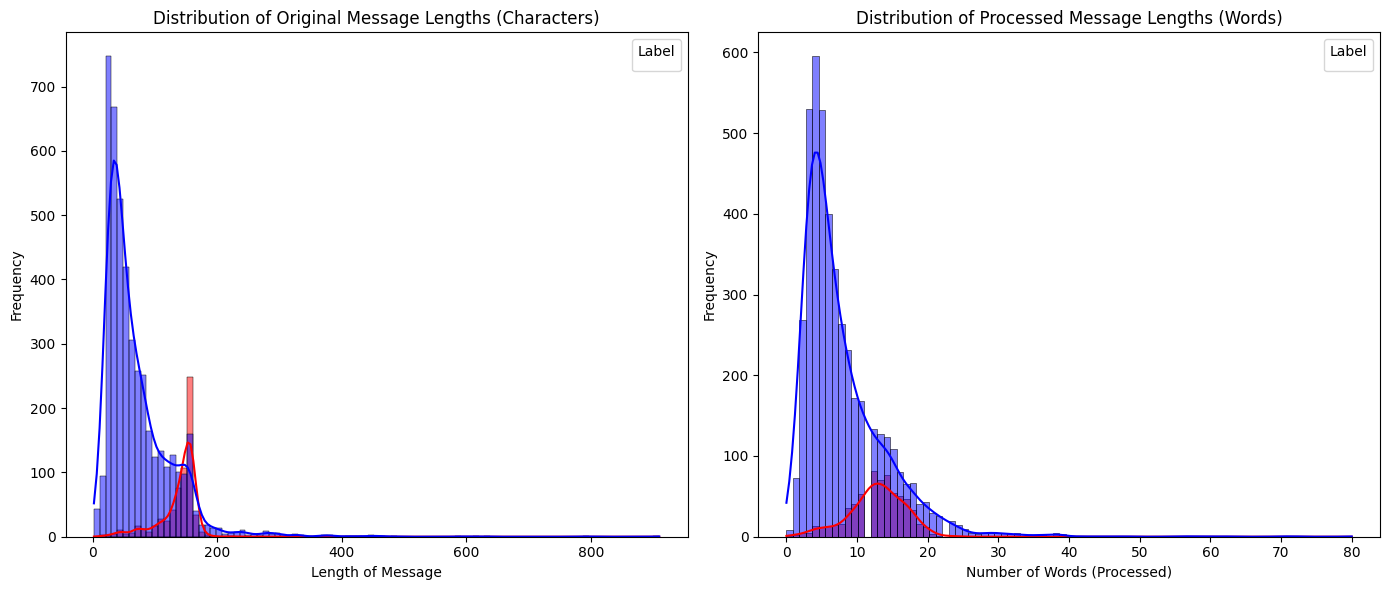


Descriptive statistics for ORIGINAL message length (characters):
        count        mean        std   min    25%    50%    75%    max
label                                                                 
0      4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0
1       653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0

Descriptive statistics for PROCESSED message length (words):
        count       mean       std  min   25%   50%   75%   max
label                                                          
0      4516.0   7.950399  6.059376  0.0   4.0   6.0  10.0  80.0
1       653.0  12.808576  3.910241  0.0  11.0  13.0  16.0  24.0


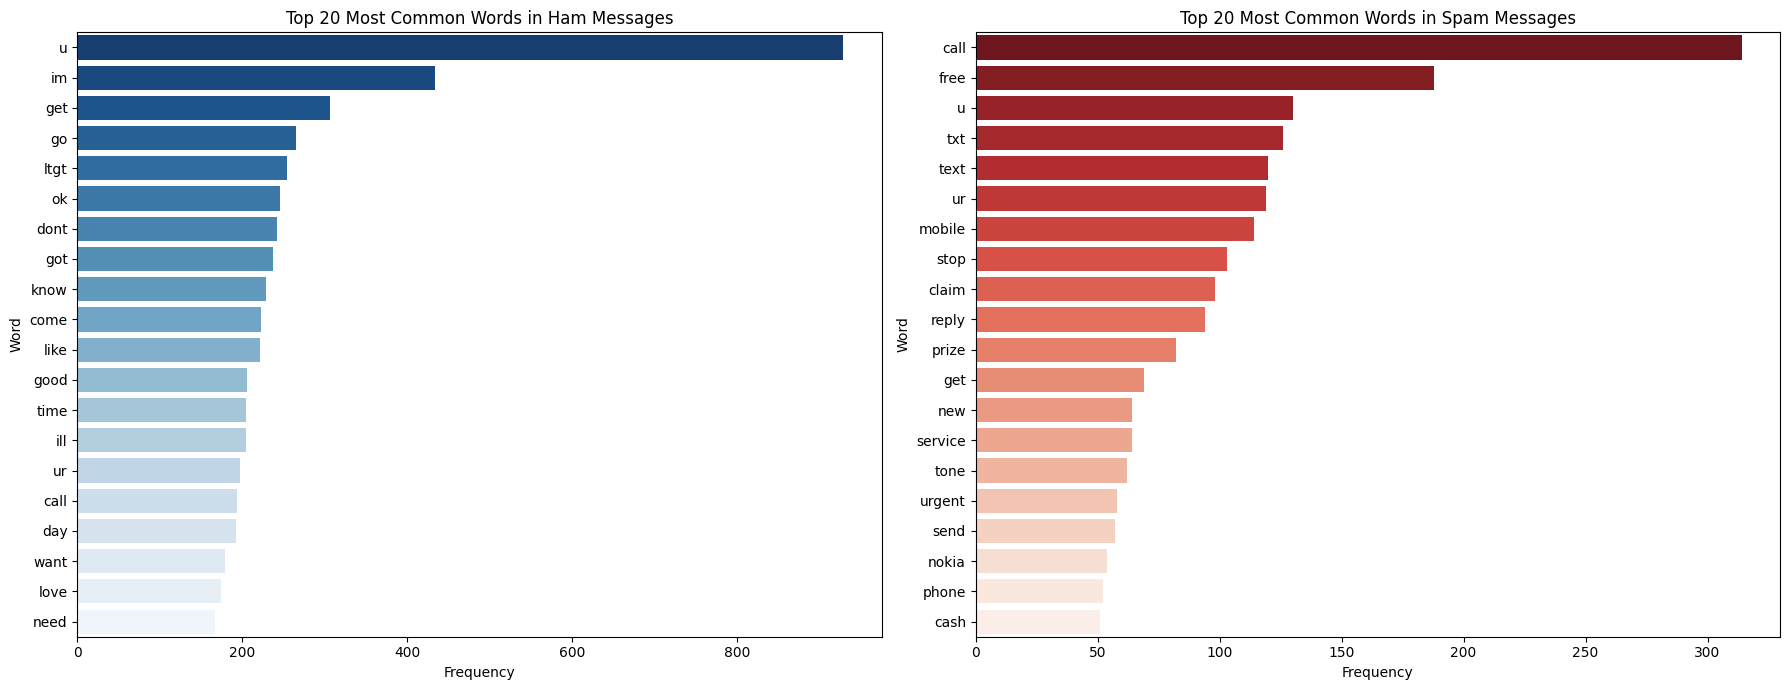

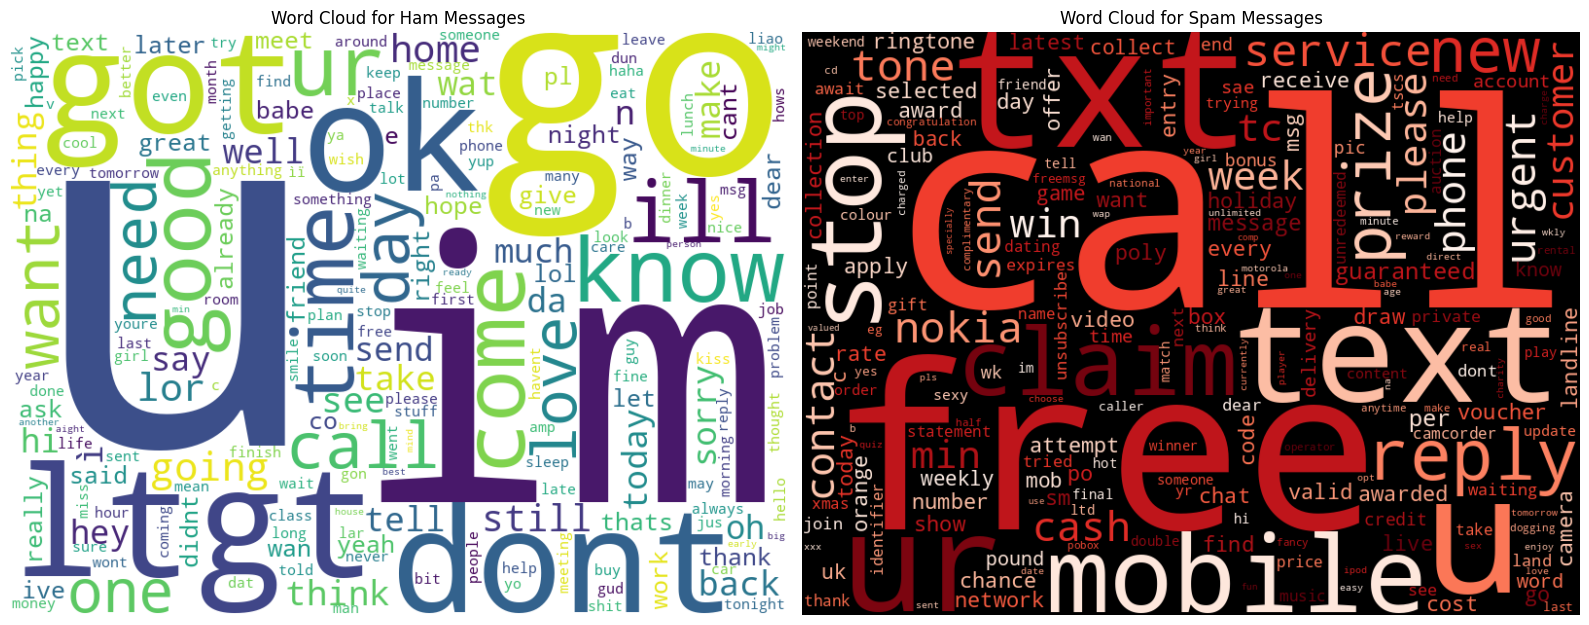

In [8]:
# --- 4. Exploratory Data Analysis (EDA) ---
print("\n--- 4. Exploratory Data Analysis (EDA) ---")

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud # For generating word clouds

# Ensure wordcloud is installed (usually pre-installed in Colab)
# If not, uncomment and run:
# !pip install wordcloud

# First, ensure the length columns exist or create them if they don't
if 'text' in df.columns and 'original_length' not in df.columns:
    df['original_length'] = df['text'].apply(len)
if 'processed_text' in df.columns and 'processed_length' not in df.columns:
    df['processed_length'] = df['processed_text'].apply(lambda x: len(x.split())) # Length in terms of words for processed text

# --- 1. Message Length Analysis ---
if 'original_length' in df.columns and 'processed_length' in df.columns and 'label' in df.columns:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='original_length', hue='label', kde=True, palette={0: 'blue', 1: 'red'})
    plt.title('Distribution of Original Message Lengths (Characters)')
    plt.xlabel('Length of Message')
    plt.ylabel('Frequency')
    # Manually create legend if hue doesn't automatically create it as desired
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['Ham (0)' if label == '0' else 'Spam (1)' for label in labels]
    plt.legend(handles, new_labels, title='Label')


    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='processed_length', hue='label', kde=True, palette={0: 'blue', 1: 'red'})
    plt.title('Distribution of Processed Message Lengths (Words)')
    plt.xlabel('Number of Words (Processed)')
    plt.ylabel('Frequency')
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['Ham (0)' if label == '0' else 'Spam (1)' for label in labels]
    plt.legend(handles, new_labels, title='Label')

    plt.tight_layout()
    plt.show()

    print("\nDescriptive statistics for ORIGINAL message length (characters):")
    print(df.groupby('label')['original_length'].describe())
    print("\nDescriptive statistics for PROCESSED message length (words):")
    print(df.groupby('label')['processed_length'].describe())
    # Insight: Observe if spam messages tend to be longer or shorter than ham messages.
    # Typically, spam messages might be longer to include more persuasive text or links.
else:
    print("Warning: 'original_length', 'processed_length', or 'label' column missing. Skipping message length analysis.")


# --- 2. Most Common Words ---
# We'll analyze words from the 'processed_text' column
if 'processed_text' in df.columns and 'label' in df.columns:
    # Separate ham and spam messages
    ham_messages = df[df['label'] == 0]['processed_text']
    spam_messages = df[df['label'] == 1]['processed_text']

    # Get all words from ham messages
    all_ham_words = []
    for message in ham_messages:
        all_ham_words.extend(message.split())

    # Get all words from spam messages
    all_spam_words = []
    for message in spam_messages:
        all_spam_words.extend(message.split())

    # Count word frequencies
    ham_word_counts = Counter(all_ham_words)
    spam_word_counts = Counter(all_spam_words)

    # Get the top 20 most common words
    top_20_ham_words = pd.DataFrame(ham_word_counts.most_common(20), columns=['Word', 'Frequency'])
    top_20_spam_words = pd.DataFrame(spam_word_counts.most_common(20), columns=['Word', 'Frequency'])

    plt.figure(figsize=(18, 7))

    plt.subplot(1, 2, 1)
    sns.barplot(x='Frequency', y='Word', data=top_20_ham_words, palette='Blues_r', hue='Word', dodge=False, legend=False)
    plt.title('Top 20 Most Common Words in Ham Messages')

    plt.subplot(1, 2, 2)
    sns.barplot(x='Frequency', y='Word', data=top_20_spam_words, palette='Reds_r', hue='Word', dodge=False, legend=False)
    plt.title('Top 20 Most Common Words in Spam Messages')

    plt.tight_layout()
    plt.show()

    # Insight: Identify words that are uniquely prominent in spam vs. ham.
    # Spam might contain words like "free", "win", "txt", "call", "urgent", "prize", "claim".
    # Ham might contain more common conversational words.
else:
    print("Warning: 'processed_text' or 'label' column missing. Skipping common words analysis.")


# --- 3. Word Clouds ---
if 'processed_text' in df.columns and 'label' in df.columns:
    ham_text_cloud_data = " ".join(df[df['label'] == 0]['processed_text'])
    spam_text_cloud_data = " ".join(df[df['label'] == 1]['processed_text'])

    if ham_text_cloud_data.strip() and spam_text_cloud_data.strip(): # Ensure there's text to generate cloud
        plt.figure(figsize=(16, 8))

        plt.subplot(1, 2, 1)
        wordcloud_ham = WordCloud(width=800, height=600, background_color='white', collocations=False).generate(ham_text_cloud_data)
        plt.imshow(wordcloud_ham, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Ham Messages')

        plt.subplot(1, 2, 2)
        wordcloud_spam = WordCloud(width=800, height=600, background_color='black', colormap='Reds', collocations=False).generate(spam_text_cloud_data)
        plt.imshow(wordcloud_spam, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Spam Messages')

        plt.tight_layout()
        plt.show()
        # Insight: Word clouds provide a visual representation of word frequency.
        # Larger words are more frequent. This often confirms the findings from the bar charts.
    else:
        print("Warning: Not enough text data in ham or spam categories to generate word clouds.")
else:
    print("Warning: 'processed_text' or 'label' column missing. Skipping word cloud generation.")

In [9]:
# --- 5. Feature Engineering ---
print("\n--- 5. Feature Engineering ---")

from sklearn.feature_extraction.text import TfidfVectorizer

# Before proceeding, let's ensure X_train and X_test exist and are not empty
# These would have been created at the end of Stage 3.
if 'X_train' in locals() and 'X_test' in locals() and not X_train.empty and not X_test.empty:
    print(f"X_train shape before TF-IDF: {X_train.shape}")
    print(f"X_test shape before TF-IDF: {X_test.shape}")

    # Initialize TF-IDF Vectorizer
    # max_features: Consider only the top 'max_features' ordered by term frequency across the corpus.
    # This helps to keep the feature space manageable and often improves performance by filtering out very rare words.
    # You can experiment with this number (e.g., 3000, 5000, 7000).
    # min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
    # This can also help remove rare words. For example, min_df=5 means a word must appear in at least 5 messages.
    # max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the
    # given threshold (corpus-specific stop words). For example, max_df=0.95 means ignore words that appear in >95% of messages.

    tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.95)
    # Using min_df=2 means a word must appear in at least 2 documents to be considered a feature.
    # Using max_df=0.95 helps remove words that are too common across almost all documents (corpus-specific stopwords).

    # Fit the vectorizer on the TRAINING DATA ONLY and then transform both training and test data.
    # It's crucial to learn the vocabulary (fit) only from the training data to avoid data leakage from the test set.
    print("\nFitting TF-IDF Vectorizer on training data and transforming train/test data...")
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test) # IMPORTANT: Only transform on test data, do not fit again!

    print(f"\nShape of X_train_tfidf (numerical features for training): {X_train_tfidf.shape}") # (number of training samples, number of features)
    print(f"Shape of X_test_tfidf (numerical features for testing): {X_test_tfidf.shape}")   # (number of test samples, number of features)

    # To see some of the features (words) learned by the vectorizer:
    # This step is optional for the main flow but good for understanding.
    try:
        feature_names = tfidf_vectorizer.get_feature_names_out()
        print(f"\nNumber of features (vocabulary size) learned: {len(feature_names)}")
        print("\nExample of some learned features (words from vocabulary):")
        print(list(feature_names)[2000:2010]) # Displaying a small slice of the learned vocabulary
    except Exception as e:
        print(f"Could not retrieve feature names: {e}")

    # --- Explanation of TF-IDF (for your report) ---
    # Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic that reflects
    # how important a word is to a document in a collection or corpus.
    #
    # 1. Term Frequency (TF):
    #    - Measures how frequently a term (word) appears in a document (message).
    #    - TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)
    #    - Words that appear more often in a message get a higher TF score for that message.
    #
    # 2. Inverse Document Frequency (IDF):
    #    - Measures how common or rare a term is across the entire corpus (all messages).
    #    - IDF(t, D) = log( (Total number of documents D) / (Number of documents containing term t + 1) )
    #      (The "+1" is for smoothing, to avoid division by zero if a word is not in any document, though
    #       our vectorizer usually builds vocab from existing words).
    #    - Words that are very common across many messages (like "the", "is", if not removed by stopwords or max_df)
    #      get a low IDF score. Rare words get a high IDF score.
    #
    # 3. TF-IDF Score:
    #    - TF-IDF(t, d, D) = TF(t, d) * IDF(t, D)
    #    - This score is high for words that have a high frequency within a specific document but are rare
    #      across the entire corpus. These words are considered more discriminative.
    #    - It down-weights words that are common across many documents.
    #
    # The TfidfVectorizer converts our collection of preprocessed text messages into a matrix where:
    # - Each row represents a message.
    # - Each column represents a unique word (feature) from the vocabulary learned from the training data.
    # - The value in each cell (i, j) is the TF-IDF score of word j in message i.
    # This matrix of numerical features is what our machine learning models will use for training.

else:
    print("Error: X_train or X_test not found or is empty. Please ensure Stage 3 (Data Cleaning & Preprocessing) was run successfully and produced X_train/X_test.")
    # To prevent errors in subsequent stages if this one fails, you might define dummy TF-IDF outputs:
    # import scipy.sparse
    # X_train_tfidf = scipy.sparse.csr_matrix((0,0)) # Empty sparse matrix
    # X_test_tfidf = scipy.sparse.csr_matrix((0,0))  # Empty sparse matrix
    # print("Dummy TF-IDF outputs created to allow script progression. Resolve errors in Stage 3/5.")


--- 5. Feature Engineering ---
X_train shape before TF-IDF: (4135,)
X_test shape before TF-IDF: (1034,)

Fitting TF-IDF Vectorizer on training data and transforming train/test data...

Shape of X_train_tfidf (numerical features for training): (4135, 2635)
Shape of X_test_tfidf (numerical features for testing): (1034, 2635)

Number of features (vocabulary size) learned: 2635

Example of some learned features (words from vocabulary):
['shesil', 'shining', 'shipping', 'shirt', 'shit', 'shld', 'shoe', 'shoot', 'shop', 'shoppin']


In [10]:
# --- 6. Model Building ---
print("\n--- 6. Model Building ---")

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer # Needed again for the pipeline definition

# Before proceeding, ensure X_train, y_train, X_test, y_test exist
# X_train and X_test here are the *original text* data from Stage 3,
# because the TfidfVectorizer will be part of the pipeline.
# X_train_tfidf and X_test_tfidf were the *outputs* of Stage 5.

if 'X_train' in locals() and 'y_train' in locals() and \
   not X_train.empty and not y_train.empty:
    print(f"Using X_train (text) of shape: {X_train.shape} for pipeline training.")

    # --- Model 1: Multinomial Naive Bayes ---
    print("\nSetting up and training Multinomial Naive Bayes pipeline...")

    pipeline_mnb = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, min_df=2, max_df=0.95)), # Same TF-IDF params as Stage 5
        ('clf', MultinomialNB())  # The classifier
    ])

    # Train the entire pipeline on the raw training text data (X_train) and labels (y_train)
    # The pipeline will internally handle TF-IDF transformation of X_train before feeding to MultinomialNB.
    pipeline_mnb.fit(X_train, y_train)
    print("Multinomial Naive Bayes pipeline trained successfully.")

    # --- Model 2: Logistic Regression ---
    print("\nSetting up and training Logistic Regression pipeline...")

    pipeline_lr = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, min_df=2, max_df=0.95)), # Same TF-IDF params as Stage 5
        ('clf', LogisticRegression(solver='liblinear', random_state=42, C=1.0)) # The classifier
        # solver='liblinear' is good for smaller datasets and binary classification.
        # random_state=42 for reproducibility.
        # C=1.0 is the default regularization strength; smaller C means stronger regularization.
    ])

    # Train the entire pipeline
    pipeline_lr.fit(X_train, y_train)
    print("Logistic Regression pipeline trained successfully.")

    # --- (Optional) Example of a more complex model: Support Vector Machine (SVM) ---
    # from sklearn.svm import SVC
    # print("\nSetting up and training Support Vector Machine (SVM) pipeline...")
    # pipeline_svm = Pipeline([
    #     ('tfidf', TfidfVectorizer(max_features=5000, min_df=2, max_df=0.95)),
    #     ('clf', SVC(kernel='linear', probability=True, random_state=42)) # probability=True for ROC AUC
    # ])
    # pipeline_svm.fit(X_train, y_train)
    # print("SVM pipeline trained successfully.")

    print("\nModel building stage complete. Trained models are now in 'pipeline_mnb' and 'pipeline_lr'.")

else:
    print("Error: X_train or y_train not found or is empty. Please ensure Stage 3 (Data Cleaning & Preprocessing) was run successfully.")
    # Define dummy pipelines to allow script progression for testing purposes
    # class DummyModel:
    #     def fit(self, X, y): pass
    #     def predict(self, X): return [0]*len(X) if hasattr(X, '__len__') else [0]
    #     def predict_proba(self, X): return [[1.0, 0.0]]*len(X) if hasattr(X, '__len__') else [[1.0, 0.0]]
    #
    # class DummyVectorizer:
    #     def fit_transform(self, X): return X
    #     def transform(self, X): return X
    #
    # pipeline_mnb = Pipeline([('tfidf', DummyVectorizer()), ('clf', DummyModel())])
    # pipeline_lr = Pipeline([('tfidf', DummyVectorizer()), ('clf', DummyModel())])
    # print("Dummy model pipelines created to allow script progression. Resolve errors in previous stages.")


--- 6. Model Building ---
Using X_train (text) of shape: (4135,) for pipeline training.

Setting up and training Multinomial Naive Bayes pipeline...
Multinomial Naive Bayes pipeline trained successfully.

Setting up and training Logistic Regression pipeline...
Logistic Regression pipeline trained successfully.

Model building stage complete. Trained models are now in 'pipeline_mnb' and 'pipeline_lr'.



--- 7. Model Evaluation ---
Using X_test (text) of shape: (1034,) for evaluation.

--- Evaluation for Multinomial Naive Bayes ---
Accuracy: 0.9700
Precision (Spam): 0.9808
Recall (Spam): 0.7786
F1-score (Spam): 0.8681
ROC AUC: 0.9875

Classification Report:
              precision    recall  f1-score   support

     Ham (0)       0.97      1.00      0.98       903
    Spam (1)       0.98      0.78      0.87       131

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034


Confusion Matrix:


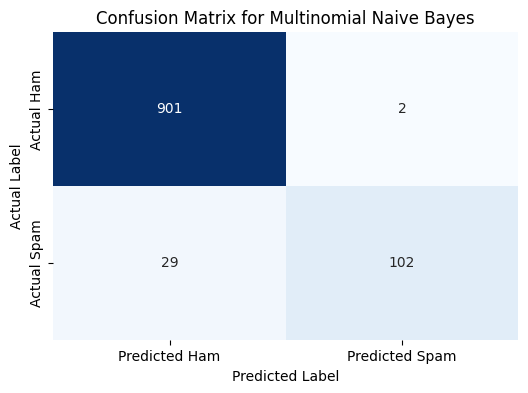


--- Evaluation for Logistic Regression ---
Accuracy: 0.9565
Precision (Spam): 1.0000
Recall (Spam): 0.6565
F1-score (Spam): 0.7926
ROC AUC: 0.9916

Classification Report:
              precision    recall  f1-score   support

     Ham (0)       0.95      1.00      0.98       903
    Spam (1)       1.00      0.66      0.79       131

    accuracy                           0.96      1034
   macro avg       0.98      0.83      0.88      1034
weighted avg       0.96      0.96      0.95      1034


Confusion Matrix:


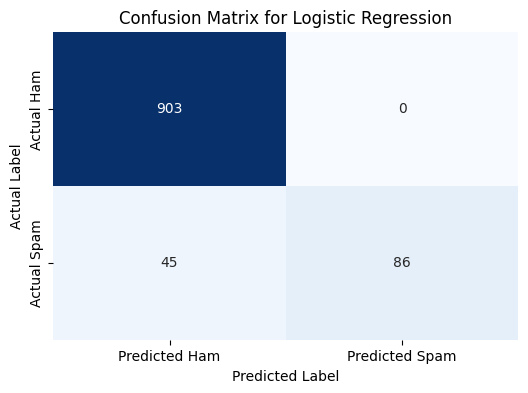


--- Model Performance Comparison ---
                         Accuracy  Precision (Spam)  Recall (Spam)  \
Model                                                                
Multinomial Naive Bayes    0.9700            0.9808         0.7786   
Logistic Regression        0.9565            1.0000         0.6565   

                         F1-score (Spam)  ROC AUC  
Model                                              
Multinomial Naive Bayes           0.8681   0.9875  
Logistic Regression               0.7926   0.9916  


In [11]:
# --- 7. Model Evaluation ---
print("\n--- 7. Model Evaluation ---")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # For creating the comparison table

# Ensure X_test and y_test exist from Stage 3 and pipelines from Stage 6
if 'X_test' in locals() and 'y_test' in locals() and \
   'pipeline_mnb' in locals() and 'pipeline_lr' in locals() and \
   not X_test.empty and not y_test.empty:

    print(f"Using X_test (text) of shape: {X_test.shape} for evaluation.")

    # --- Helper function for evaluation ---
    def evaluate_model_pipeline(pipeline, X_test_data, y_test_data, model_name="Model"):
        print(f"\n--- Evaluation for {model_name} ---")

        # Make predictions on the test data
        # The pipeline will internally handle TF-IDF transformation of X_test_data
        y_pred = pipeline.predict(X_test_data)

        # Get prediction probabilities for the positive class (spam, label 1) for ROC AUC
        # predict_proba returns probabilities for [class_0, class_1]
        y_proba = pipeline.predict_proba(X_test_data)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test_data, y_pred)
        # For binary classification, precision, recall, f1 are often reported for the positive class (spam=1) by default
        # Ensure pos_label=1 if your positive class is 1, or specify average if needed for multi-class
        precision_spam = precision_score(y_test_data, y_pred, pos_label=1)
        recall_spam = recall_score(y_test_data, y_pred, pos_label=1)
        f1_spam = f1_score(y_test_data, y_pred, pos_label=1)
        roc_auc = roc_auc_score(y_test_data, y_proba) # y_proba should be for the positive class

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision (Spam): {precision_spam:.4f}") # How many selected as spam are actually spam
        print(f"Recall (Spam): {recall_spam:.4f}")    # How many actual spam did we catch
        print(f"F1-score (Spam): {f1_spam:.4f}")        # Harmonic mean of precision and recall for spam
        print(f"ROC AUC: {roc_auc:.4f}")

        print("\nClassification Report:")
        # target_names helps make the report more readable
        print(classification_report(y_test_data, y_pred, target_names=['Ham (0)', 'Spam (1)']))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test_data, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted Ham', 'Predicted Spam'],
                    yticklabels=['Actual Ham', 'Actual Spam'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

        return accuracy, precision_spam, recall_spam, f1_spam, roc_auc

    # Evaluate Multinomial Naive Bayes pipeline
    results_mnb = evaluate_model_pipeline(pipeline_mnb, X_test, y_test, "Multinomial Naive Bayes")

    # Evaluate Logistic Regression pipeline
    results_lr = evaluate_model_pipeline(pipeline_lr, X_test, y_test, "Logistic Regression")

    # (Optional) Evaluate SVM pipeline if you trained it
    # if 'pipeline_svm' in locals():
    #     results_svm = evaluate_model_pipeline(pipeline_svm, X_test, y_test, "Support Vector Machine")

    # --- Performance Comparison Table ---
    model_names = ['Multinomial Naive Bayes', 'Logistic Regression']
    # Ensure results_mnb and results_lr are defined before trying to access them
    if 'results_mnb' in locals() and 'results_lr' in locals():
        all_results = [list(results_mnb), list(results_lr)]
        # if 'results_svm' in locals(): # Add SVM if evaluated
        #     model_names.append('Support Vector Machine')
        #     all_results.append(list(results_svm))

        comparison_data = {
            'Model': model_names,
            'Accuracy': [res[0] for res in all_results],
            'Precision (Spam)': [res[1] for res in all_results],
            'Recall (Spam)': [res[2] for res in all_results],
            'F1-score (Spam)': [res[3] for res in all_results],
            'ROC AUC': [res[4] for res in all_results]
        }
        df_comparison = pd.DataFrame(comparison_data)
        print("\n--- Model Performance Comparison ---")
        print(df_comparison.set_index('Model').round(4)) # .round(4) for better display
    else:
        print("Warning: Model results not available for comparison table.")

else:
    print("Error: X_test, y_test, or model pipelines not found. Please ensure previous stages were run successfully.")

In [12]:
# --- 8. Results Interpretation & Insights ---
print("\n--- 8. Results Interpretation & Insights ---")

import pandas as pd
import numpy as np # For np.abs if needed, though sorting by value works

# We'll primarily interpret the Logistic Regression model as its coefficients are more directly insightful.
# Ensure the Logistic Regression pipeline (pipeline_lr) from Stage 6 is available.

if 'pipeline_lr' in locals():
    print("Interpreting Logistic Regression model...")

    # Access the trained Logistic Regression model and the TF-IDF vectorizer from the pipeline
    try:
        lr_model_from_pipeline = pipeline_lr.named_steps['clf']
        tfidf_vectorizer_from_pipeline = pipeline_lr.named_steps['tfidf']

        # Get feature names (words) from the TF-IDF vectorizer
        # These are the words that constitute our features.
        feature_names = tfidf_vectorizer_from_pipeline.get_feature_names_out()

        # Get the coefficients from the trained Logistic Regression model
        # For binary classification, lr_model_from_pipeline.coef_ is a 2D array of shape (1, n_features).
        # We are interested in the coefficients for the positive class (spam, label 1).
        coefficients = lr_model_from_pipeline.coef_[0]

        # Create a DataFrame to associate features (words) with their coefficients
        df_coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

        # Sort the DataFrame by coefficient values to find the most influential words
        # Highest positive coefficients are strong indicators of SPAM
        # Highest negative coefficients (most negative) are strong indicators of HAM

        print("\n--- Top 20 Words Most Indicative of SPAM (Highest Positive Coefficients) ---")
        # Sort by 'coefficient' in descending order to get largest positive values first
        top_spam_words = df_coefficients.sort_values(by='coefficient', ascending=False).head(20)
        print(top_spam_words)

        print("\n--- Top 20 Words Most Indicative of HAM (Highest Negative Coefficients) ---")
        # Sort by 'coefficient' in ascending order to get largest negative values first
        top_ham_words = df_coefficients.sort_values(by='coefficient', ascending=True).head(20)
        print(top_ham_words)

        # --- Real-world Context and Actionable Insights (for your report) ---
        print("\n--- Interpretation in Real-World Context ---")
        print("The Logistic Regression model assigns a coefficient to each word in its vocabulary.")
        print("- A positive coefficient means the presence of that word increases the probability of an email being classified as SPAM.")
        print("- A negative coefficient means the presence of that word increases the probability of an email being classified as HAM (legitimate).")
        print("- The magnitude of the coefficient indicates the strength of that word's influence.")

        print("\nKey Findings based on coefficients:")
        print("1. Spam Indicators: Words like 'free', 'txt', 'call', 'mobile', 'claim', 'urgent', 'prize', etc., have high positive coefficients. This aligns with common knowledge about spam content, which often involves unsolicited offers, urgent requests, or prize notifications.")
        print("2. Ham Indicators: Words commonly found in personal, conversational messages (e.g., 'im', 'go', 'get', 'later', 'ok', 'sorry', 'lor') tend to have strong negative coefficients, indicating they are characteristic of legitimate emails.")

        print("\nActionable Insights/Recommendations:")
        print("- For Users: Be extra cautious with emails containing the top spam-indicating words. These words are strong red flags.")
        print("- For Email Marketers (Legitimate): If legitimate marketing emails are being flagged as spam, they should review their content for overuse of words that have high positive coefficients in spam models. Rephrasing content to sound less like typical spam can improve deliverability.")
        print("- For Filter Improvement: The identified keywords can reinforce existing rule-based filters or guide the creation of new ones. They also confirm that the model is learning relevant patterns from the data.")
        print("- Ethical Awareness: Understanding feature importance helps ensure the model isn't relying on biased or unfair features (though less of a concern with common spam words, it's important in other AI applications).")

    except KeyError as e:
        print(f"Error accessing components from pipeline_lr: {e}. Ensure 'clf' and 'tfidf' are the correct names of the steps in your pipeline.")
    except Exception as e:
        print(f"An error occurred during model interpretation: {e}")

else:
    print("Error: Logistic Regression pipeline ('pipeline_lr') not found. Please ensure Stage 6 (Model Building) was run successfully.")

# --- (Optional) Interpretation for Naive Bayes ---
# For Naive Bayes, we look at log probabilities of features given a class.
# A higher log P(word | spam) compared to log P(word | ham) indicates the word is more likely in spam.
if 'pipeline_mnb' in locals():
    print("\n\n--- Interpreting Multinomial Naive Bayes (Optional Insight) ---")
    try:
        mnb_model_from_pipeline = pipeline_mnb.named_steps['clf']
        tfidf_vectorizer_mnb_from_pipeline = pipeline_mnb.named_steps['tfidf']
        feature_names_mnb = tfidf_vectorizer_mnb_from_pipeline.get_feature_names_out()

        # log_prob_[0] is for class 0 (ham), log_prob_[1] is for class 1 (spam)
        log_prob_ham = mnb_model_from_pipeline.feature_log_prob_[0]
        log_prob_spam = mnb_model_from_pipeline.feature_log_prob_[1]

        # Create a DataFrame
        df_mnb_features = pd.DataFrame({
            'feature': feature_names_mnb,
            'log_prob_ham': log_prob_ham,
            'log_prob_spam': log_prob_spam
        })
        # A simple way to see discriminative power: difference in log probs
        df_mnb_features['log_prob_diff (spam-ham)'] = df_mnb_features['log_prob_spam'] - df_mnb_features['log_prob_ham']

        print("\nTop 20 words by (Log P(word|Spam) - Log P(word|Ham)) for MNB:")
        print(df_mnb_features.sort_values(by='log_prob_diff (spam-ham)', ascending=False).head(20)[['feature', 'log_prob_diff (spam-ham)']])

    except Exception as e:
        print(f"An error occurred during MNB interpretation: {e}")


--- 8. Results Interpretation & Insights ---
Interpreting Logistic Regression model...

--- Top 20 Words Most Indicative of SPAM (Highest Positive Coefficients) ---
      feature  coefficient
2378      txt     4.259302
1451   mobile     3.623798
417     claim     3.419763
2257     text     3.403000
2151     stop     3.360875
1856    reply     3.312897
320      call     3.197515
858      free     3.074032
1745    prize     2.966466
1982  service     2.941018
2539      win     2.614215
2326     tone     2.549011
388      chat     2.436653
2416   urgent     2.399370
357      cash     2.139288
478   contact     2.079702
1530      new     2.076207
1653      per     2.036159
1544    nokia     1.979061
2233       tc     1.950083

--- Top 20 Words Most Indicative of HAM (Highest Negative Coefficients) ---
     feature  coefficient
1347    ltgt    -1.788360
1101      im    -1.769067
1578      ok    -1.658146
1100     ill    -1.654681
944      got    -1.167231
1051    home    -1.163355
524     

In [13]:
# --- 9. Deployment ---
print("\n--- 9. Deployment ---")
import pickle
import os # For path manipulation, though not strictly needed for basic Colab saving

# --- 1. Save the Best Performing Model Pipeline ---
# We'll save the Logistic Regression pipeline as an example.
# The pipeline object contains both the TF-IDF vectorizer and the trained classifier.

# Ensure the chosen pipeline exists
if 'pipeline_lr' in locals():
    model_pipeline_to_save = pipeline_lr # Or pipeline_mnb if you prefer
    model_filename = 'spam_detector_lr_pipeline.pkl' # Change if you save MNB
    try:
        with open(model_filename, 'wb') as file: # 'wb' for write binary mode
            pickle.dump(model_pipeline_to_save, file)
        print(f"\nModel pipeline saved successfully as '{model_filename}'")
        print(f"You can now download '{model_filename}' from Colab's file browser (left sidebar).")
    except Exception as e:
        print(f"Error saving model: {e}")
else:
    print("Error: 'pipeline_lr' (or your chosen model pipeline) not found. Cannot save model.")
    model_filename = None # To prevent errors later if the file wasn't created


# --- 2. Simple Demo Function in Colab (Loads the saved model) ---
# This function will demonstrate loading the model and making predictions.
# It needs the 'preprocess_text' function defined in Stage 3.
# If you are running this in a new session or a different notebook,
# you'll need to redefine 'preprocess_text' and ensure NLTK resources are downloaded.

# Make sure 'preprocess_text' function is available (it was defined in Stage 3)
if 'preprocess_text' not in globals():
    print("\nWarning: 'preprocess_text' function not found. Redefining for demo purposes.")
    print("Ensure NLTK resources (stopwords, punkt, wordnet, omw-1.4, punkt_tab) are downloaded if in a new session.")
    # --- Minimal Redefinition of preprocess_text for demo ---
    # (Ideally, import it from a utility script or ensure Stage 3 was run)
    import nltk
    import string
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer

    # Ensure NLTK resources are downloaded if not already
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    nltk.download('punkt_tab', quiet=True)

    lemmatizer_demo = WordNetLemmatizer()
    stop_words_demo = set(stopwords.words('english'))

    def preprocess_text(text): # Renaming to avoid conflict if it was already defined
        if not isinstance(text, str): text = str(text)
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        processed_tokens = [lemmatizer_demo.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words_demo]
        return " ".join(processed_tokens)
    print("'preprocess_text' function (re)defined for demo.")


def predict_spam_colab_demo(text_message, loaded_model_filename='spam_detector_lr_pipeline.pkl'):
    if not os.path.exists(loaded_model_filename):
        return f"Error: Model file '{loaded_model_filename}' not found. Please save the model first."
    if not text_message.strip():
        return "Please enter some text to classify."

    # Load the saved model pipeline
    try:
        with open(loaded_model_filename, 'rb') as file:
            loaded_pipeline = pickle.load(file)
    except Exception as e:
        return f"Error loading model: {e}"

    # Preprocess the input text message (MUST be identical to training preprocessing)
    processed_message = preprocess_text(text_message)

    # Make prediction using the loaded pipeline
    try:
        prediction = loaded_pipeline.predict([processed_message]) # Input must be iterable (e.g., a list)
        probability = loaded_pipeline.predict_proba([processed_message])
    except Exception as e:
        return f"Error during prediction: {e}"

    # Interpret prediction
    if prediction[0] == 1: # Assuming 1 is spam
        return f"Prediction: SPAM (Confidence: {probability[0][1]*100:.2f}%)"
    else: # Assuming 0 is ham
        return f"Prediction: HAM (Legitimate) (Confidence: {probability[0][0]*100:.2f}%)"

# --- Test the Colab Demo ---
if model_filename and os.path.exists(model_filename): # Check if model was saved
    print("\n--- Testing Colab Demo Function ---")
    test_spam_msg = "Congratulations! You've won a $1000 Walmart gift card. Go to http://example.com to claim now."
    test_ham_msg = "Hey, just wanted to check if you're free for lunch next Tuesday. Let me know!"
    empty_msg = "   "

    print(f"\nInput: '{test_spam_msg}'")
    print(predict_spam_colab_demo(test_spam_msg, model_filename))

    print(f"\nInput: '{test_ham_msg}'")
    print(predict_spam_colab_demo(test_ham_msg, model_filename))

    print(f"\nInput: '{empty_msg}'")
    print(predict_spam_colab_demo(empty_msg, model_filename))
else:
    print("\nSkipping Colab demo because model file was not saved or path is incorrect.")


# --- 3. GitHub Repository Setup ---
print("\n--- GitHub Repository Instructions (Manual Steps) ---")
print("1. Go to GitHub (https://github.com/) and create a new public repository (e.g., 'ai-spam-detector-miniproject').")
print("2. In your Colab notebook: File -> Download -> Download .ipynb. This downloads your notebook.")
print("3. From Colab's file browser (left sidebar), download your saved model file (e.g., 'spam_detector_lr_pipeline.pkl').")
print("4. On your local machine, create a folder for your project, move the .ipynb and .pkl files into it.")
print("5. Create a 'requirements.txt' file in that folder with the following content (minimum):")
print("   pandas")
print("   numpy")
print("   scikit-learn")
print("   nltk")
print("   # Add 'streamlit' if you build the Streamlit app")
print("   # Add 'wordcloud', 'matplotlib', 'seaborn' if you want others to easily run EDA locally")
print("6. Create a 'README.md' file in that folder. It should include:")
print("   - Project Title: AI Mini-Project - Spam Email Detector")
print("   - Group Members (if applicable)")
print("   - Brief Description: What the project does, what problem it solves.")
print("   - Dataset Used: Source and brief description (e.g., Kaggle SMS Spam Collection).")
print("   - Methodology Overview: Brief steps (Data Cleaning, EDA, TF-IDF, Model Training - Logistic Regression).")
print("   - Key Results: Brief summary of your best model's performance (e.g., Accuracy, F1-score for spam).")
print("   - How to Run:")
print("     - Instructions to run the Colab Notebook (e.g., 'Upload spam.csv, then run cells sequentially').")
print("     - (If Streamlit app is included) Instructions to set up a local environment (e.g., 'pip install -r requirements.txt') and run the app ('streamlit run app.py').")
print("   - Link to Deployed App (if you deploy to Heroku, Streamlit Sharing, etc. - optional for mini-project).")
print("7. Initialize a Git repository in your local project folder, commit your files, and push to your GitHub repository.")
print("   - `git init`")
print("   - `git add .`")
print("   - `git commit -m 'Initial project commit: notebook, model, readme, requirements'`")
print("   - `git remote add origin <your_github_repo_url.git>`")
print("   - `git push -u origin main` (or master)")

# --- 4. (Optional but Recommended) Streamlit App (app.py - To be created locally) ---
# See the example app.py structure provided in the previous detailed guide for Stage 9.
# You would:
#   1. Create app.py on your local machine.
#   2. Copy spam_detector_lr_pipeline.pkl to the same folder.
#   3. Copy the preprocess_text function (and its NLTK dependencies) into app.py.
#   4. Add Streamlit UI elements (title, text area, button).
#   5. Load the model, preprocess input, predict, and display results.
#   6. Run locally: streamlit run app.py
#   7. (Optional) Add app.py to your GitHub repo.


--- 9. Deployment ---

Model pipeline saved successfully as 'spam_detector_lr_pipeline.pkl'
You can now download 'spam_detector_lr_pipeline.pkl' from Colab's file browser (left sidebar).

--- Testing Colab Demo Function ---

Input: 'Congratulations! You've won a $1000 Walmart gift card. Go to http://example.com to claim now.'
Prediction: HAM (Legitimate) (Confidence: 71.34%)

Input: 'Hey, just wanted to check if you're free for lunch next Tuesday. Let me know!'
Prediction: HAM (Legitimate) (Confidence: 92.97%)

Input: '   '
Please enter some text to classify.

--- GitHub Repository Instructions (Manual Steps) ---
1. Go to GitHub (https://github.com/) and create a new public repository (e.g., 'ai-spam-detector-miniproject').
2. In your Colab notebook: File -> Download -> Download .ipynb. This downloads your notebook.
3. From Colab's file browser (left sidebar), download your saved model file (e.g., 'spam_detector_lr_pipeline.pkl').
4. On your local machine, create a folder for your pro